In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

mapping하기

benign: 양성 (0)

malignant: 악성 (1)

In [ ]:
data.drop(['id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


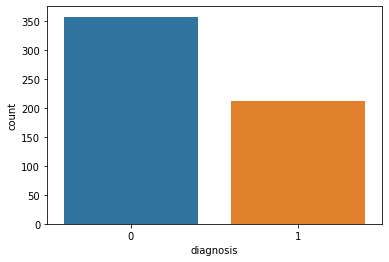

In [ ]:
sns.countplot(data['diagnosis'])

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

train_input = train.drop(['diagnosis'],axis=1)
train_target = train.diagnosis

test_input = test.drop(['diagnosis'],axis=1)
test_target = test.diagnosis

print(len(train), len(test))

455 114


In [ ]:
#서포트 벡터 머신
sc = svm.SVC()
sc.fit(train_input, train_target)

prediction_sc = sc.predict(test_input)
print('SVM: %.2f' %(metrics.accuracy_score(prediction_sc,test_target)*100))

SVM: 94.74


In [ ]:
#의사 결정 나무
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

prediction_dt = dt.predict(test_input)
print('DecisionTreeClassifier: %.2f' %(metrics.accuracy_score(prediction_dt,test_target)*100))

DecisionTreeClassifier: 93.86


In [ ]:
#k-최근접 이웃
kc = KNeighborsClassifier()
kc.fit(train_input, train_target)

prediction_kc = kc.predict(test_input)
print('KNeighborsClassfier: %.2f' %(metrics.accuracy_score(prediction_kc,test_target)*100))

KNeighborsClassfier: 95.61


In [ ]:
#로지스틱회귀함수
lr = LogisticRegression()
lr.fit(train_input, train_target)

prediction_lr = lr.predict(test_input)
print('LogisticRegression: %.2f' %(metrics.accuracy_score(prediction_lr,test_target)*100))

LogisticRegression: 96.49


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#랜덤포레스트
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_input,train_target)

prediction_rf = rf.predict(test_input)
print('RandomForestClassifier: %.2f' %(metrics.accuracy_score(prediction_rf,test_target)*100))

RandomForestClassifier: 96.49


In [ ]:
#빠지면 섭섭하지...
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_input, train_target)

prediction_gb = gb.predict(test_input)
print('GradientBoostingClassifier: %.2f' %(metrics.accuracy_score(prediction_gb,test_target)*100))


GradientBoostingClassifier: 95.61


In [ ]:
#중요도
features = pd.Series(
    gb.feature_importances_,
    index = train_input.columns
).sort_values(ascending=False)

print(features)

concave points_mean        0.448731
concave points_worst       0.240709
radius_worst               0.075445
perimeter_worst            0.051916
texture_worst              0.044281
area_worst                 0.037140
texture_mean               0.023418
concavity_worst            0.020792
concavity_se               0.016314
area_se                    0.009085
radius_se                  0.006482
smoothness_worst           0.004894
texture_se                 0.003564
compactness_se             0.002854
concavity_mean             0.002622
smoothness_mean            0.002277
concave points_se          0.002262
compactness_mean           0.001993
radius_mean                0.000953
compactness_worst          0.000904
smoothness_se              0.000837
symmetry_worst             0.000663
perimeter_mean             0.000587
symmetry_se                0.000405
fractal_dimension_se       0.000266
symmetry_mean              0.000245
fractal_dimension_mean     0.000204
area_mean                  0

In [ ]:
top_5_features = features.keys()[:5]
print(top_5_features)

Index(['concave points_mean', 'concave points_worst', 'radius_worst',
       'perimeter_worst', 'texture_worst'],
      dtype='object')


In [ ]:
#교차검증: train데이터가 적을때

models = {
    'SVM': svm.SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

cv = KFold(n_splits=6, random_state=42)
#6 교차검증

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 93.32%
DecisionTreeClassifier: 94.73%
KNeighborsClassifier: 93.32%
LogisticRegression: 94.38%
RandomForestClassifier: 95.61%
GradientBoostingClassifier: 95.26%


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))#0~1로 스케일링 시킴
scaled_data = scaler.fit_transform(data[top_5_features])

models = {
    'SVM': svm.SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

cv = KFold(n_splits=6, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, scaled_data, data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 97.01%
DecisionTreeClassifier: 94.55%
KNeighborsClassifier: 95.78%
LogisticRegression: 96.14%
RandomForestClassifier: 95.26%
GradientBoostingClassifier: 95.43%


<모든 특성 사용하기><br>
SVM: 94.74 <br>
DecisionTreeClassifier: 93.86%<br>
KNeighborsClassfier: 95.61%<br>
LogisticRegression: 96.49%<br>
RandomForestClassifier: 96.49%<br>
GradientBoostingClassifier: 95.61%<br>

<상위 5개 특성 사용 + 6_교차검증><br>
SVM: 93.32%<br>
DecisionTreeClassifier: 94.73%<br>
KNeighborsClassifier: 93.32%<br>
LogisticRegression: 94.38%<br>
RandomForestClassifier: 95.61%<br>
GradientBoostingClassifier: 95.26%<br>

<상위 5개 특성 사용 + 6_교차검증 + 전처리(스케일링)><br>
SVM: 97.01%<br>
DecisionTreeClassifier: 94.55%<br>
KNeighborsClassifier: 95.78%<br>
LogisticRegression: 96.14%<br>
RandomForestClassifier: 95.26%<br>
GradientBoostingClassifier: 95.43%<br>




전체적으로 6개 모델 모두 상위 점수에 포함되는 것은 상위5개 특성을 선택하였고 교차검증을 실시하였고 전처리까지 하는 방법이다.